# Problem 2 (6 Points)

In this problem you'll learn how to make a 'pipeline' in SciKit-Learn. A pipeline chains together multiple sklearn modules and runs them in series. For example, you can create a pipeline to perform feature scaling and then regression. For more information see https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/


First, run the cell below to import modules and load data. Note the data axis scaling.



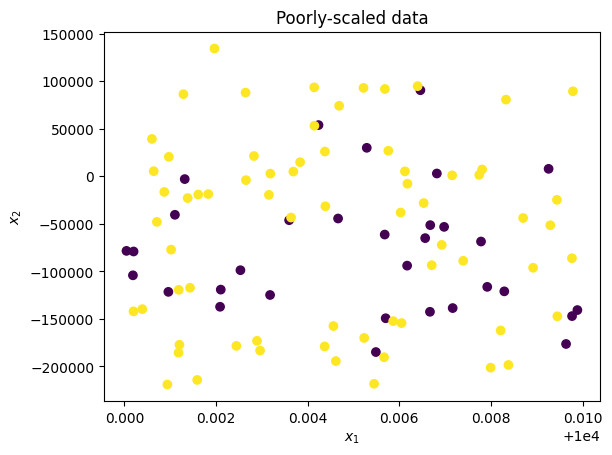

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

x1 = np.array([10000.00548814, 10000.00715189, 10000.00602763, 10000.00544883, 10000.00423655, 10000.00645894, 10000.00437587, 10000.00891773, 10000.00963663, 10000.00383442, 10000.00791725, 10000.00528895, 10000.00568045, 10000.00925597, 10000.00071036, 10000.00087129, 10000.00020218, 10000.0083262 , 10000.00778157, 10000.00870012, 10000.00978618, 10000.00799159, 10000.00461479, 10000.00780529, 10000.00118274, 10000.00639921, 10000.00143353, 10000.00944669, 10000.00521848, 10000.00414662, 10000.00264556, 10000.00774234, 10000.0045615 , 10000.00568434, 10000.0001879 , 10000.00617635, 10000.00612096, 10000.00616934, 10000.00943748, 10000.0068182 , 10000.00359508, 10000.00437032, 10000.00697631, 10000.00060225, 10000.00666767, 10000.00670638, 10000.00210383, 10000.00128926, 10000.00315428, 10000.00363711, 10000.00570197, 10000.00438602, 10000.00988374, 10000.00102045, 10000.00208877, 10000.0016131 , 10000.00653108, 10000.00253292, 10000.00466311, 10000.00244426, 10000.0015897 , 10000.00110375, 10000.0065633 , 10000.00138183, 10000.00196582, 10000.00368725, 10000.00820993, 10000.00097101, 10000.00837945, 10000.00096098, 10000.00976459, 10000.00468651, 10000.00976761, 10000.00604846, 10000.00739264, 10000.00039188, 10000.00282807, 10000.00120197, 10000.0029614 , 10000.00118728, 10000.00317983, 10000.00414263, 10000.00064147, 10000.00692472, 10000.00566601, 10000.00265389, 10000.00523248, 10000.00093941, 10000.00575946, 10000.00929296, 10000.00318569, 10000.0066741 , 10000.00131798, 10000.00716327, 10000.00289406, 10000.00183191, 10000.00586513, 10000.00020108, 10000.0082894 , 10000.00004695])
x2 = np.array([-184863.4856705 ,    1074.38382588,  -38090.38042426, -218261.93176495,   53942.6974416 ,   90630.02584275, 26090.16140437,  -96193.23522311, -176367.73593595, 14900.6554238 , -116285.92522759,   30020.05633442, -61255.25197308,    7897.51328353,  -47927.0242543 , -16408.41486272,  -79054.99813513,   80728.34445153, -68577.91165667,  -43820.95728998,   89483.56273506, -201298.31550282, -194343.64986372,    7245.70373422, -185581.10646027,   94925.90670844, -117225.70826838, -147270.93302967,   93064.78238323,   53246.3312291 , 88080.30643839,    1544.01924478, -157510.31165492, 91905.84577891, -104120.30338562,   -7778.92437832, 5252.67709964,  -93950.90837818,  -24732.85666885, 2998.60044099,  -46121.70219599, -178946.07115258, -53158.56432145,   39374.73070183, -142511.10737582, -93467.10862949, -119163.81965495,   86433.73556314, -19493.47186888,  -43328.4347383 , -149292.44670008, -31467.57278374, -140689.93945916,  -77135.24975531, -137226.1470541 ,  -19121.00345482,  -28106.82650466, -98746.88800202,  -44359.39586045, -178375.53578575, -214213.1833435 ,  -40454.74688619,  -64999.38541647, -22847.17067971,  134483.02973775,    5003.15382914, -162154.00028997,   20531.46592863, -198431.66694604, -121542.61443332,  -86141.74447922,   74200.84494844, -147027.93398436, -154379.46847931,  -88860.72719829, -139713.04577259,   21397.23298959, -177193.83575271, -183272.178717  , -119403.804027  , -124822.92056231, 93657.88484353,    5447.87262332,  -72120.38827533, -190289.19669472,   -4007.33212386, -170019.38126506, -219029.39870999,   26922.68131171,  -51475.16492676, 2877.29414027,  -51314.51123513,   -2885.24492876, -138592.30339701, -173081.8557606 ,  -18656.49335465, -152306.86977565, -142059.47999752, -120997.92531656, -78426.87568774])
X = np.vstack([x1,x2]).T
y = np.array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)

plt.figure()
plt.scatter(x1,x2,c=y,cmap="viridis")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Poorly-scaled data")
plt.show()

## Creating a pipeline

In this section, code to set up a pipeline has been given. Make note of how each step works:
1. Create a scaler and classifier
2. Put the scaler and classifier into a new pipeline
3. Fit the pipeline to the training data
4. Make predictions with the pipeline


In [2]:
# Create a scaler and a classifier
scaler = MinMaxScaler()
model = KNeighborsClassifier()

# Put the scaler and classifier into a new pipeline
pipeline = Pipeline([("MinMax Scaler", scaler), ("KNN Classifier", model)])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train)

# Make predictions with the pipeline
pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)
print("Training accuracy:", accuracy_score(y_train, pred_train), "   Testing accuracy:", accuracy_score(y_test, pred_test))

Training accuracy: 0.825    Testing accuracy: 0.6


## Testing several pipelines

Now, complete the code to create a new pipeline for every combination of scalers and models below:  

Scalers:
- None
- MinMax
- Standard


Classifiers:
- Logistic Regression
- Support Vector Machine
- KNN Classifier, 1 neighbor


Within the loop, a scaler and model are created. You will create a pipeline, fit it to the training data, and make predictions on testing and training data.

In [4]:
def get_scaler(i):
    if i == 0:
        return ("No Scaler", None)
    elif i == 1:
        return ("MinMax Scaler", MinMaxScaler())
    elif i == 2:
        return ("Standard Scaler", StandardScaler())

def get_model(i):
    if i == 0:
        return ("Logistic Regression", LogisticRegression())
    elif i == 1:
        return ("Support Vector Classifier", SVC())
    elif i == 2:
        return ("1-NN Classifier", KNeighborsClassifier(n_neighbors=1))

for scaler_index in range(3):
    for model_index in range(3):
        scaler = get_scaler(scaler_index)
        model = get_model(model_index)

        pipeline = Pipeline([scaler, model])
        pipeline.fit(X_train, y_train)
        acc_train = accuracy_score(y_train, pipeline.predict(X_train))
        acc_test = accuracy_score(y_test, pipeline.predict(X_test))

        print(f"{scaler[0]:>15},{model[0]:>26}:    Train Acc. = {100*acc_train:5.1f}%    Test Acc. = {100*acc_test:5.1f}%")

      No Scaler,       Logistic Regression:    Train Acc. =  67.5%    Test Acc. =  70.0%
      No Scaler, Support Vector Classifier:    Train Acc. =  78.8%    Test Acc. =  65.0%
      No Scaler,           1-NN Classifier:    Train Acc. = 100.0%    Test Acc. =  50.0%
  MinMax Scaler,       Logistic Regression:    Train Acc. =  67.5%    Test Acc. =  70.0%
  MinMax Scaler, Support Vector Classifier:    Train Acc. =  67.5%    Test Acc. =  70.0%
  MinMax Scaler,           1-NN Classifier:    Train Acc. = 100.0%    Test Acc. =  85.0%
Standard Scaler,       Logistic Regression:    Train Acc. =  67.5%    Test Acc. =  70.0%
Standard Scaler, Support Vector Classifier:    Train Acc. =  68.8%    Test Acc. =  70.0%
Standard Scaler,           1-NN Classifier:    Train Acc. = 100.0%    Test Acc. =  85.0%


## Questions

Answer the following questions:  

1. Which model's testing accuracy was improved the most by scaling data?  

    The support vector classifier had marginal increase, but the 1-NN classifier improved the most with scaling.

2. Which performs better on this data: MinMax scaler, Standard scaler, or neither?  

    Neither